# Volume 4: Finite Element Method
    Benj McMullin
    Math 437
    12/12/2023

In [2]:
import scipy as sp
from scipy.sparse import spdiags, diags, csr_matrix
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.

Implement the function FEM(x, eps, alpha, beta) and use it to solve the differential equation.

In [1]:
def analytic_solution(x, alpha, beta, epsilon):
    """Calculates the analytic solution"""
    return alpha + x + (beta - alpha - 1) * (np.exp(x / epsilon) - 1) / (np.exp(1 / epsilon) - 1)

In [3]:
def FEM(x, eps, alpha, beta):
    """ 
    PARAMETERS:
    x (ndarray, shape (N+1)): Grid points for solving the ODE, which may not be evenly spaced.
    eps (float): Parameter in the ODE.
    alpha (float): Left Dirichlet condition.
    beta (float): Right Dirichlet condition.
    """

    # Define the functions a and l
    def a(i, j, h = []):
        if j == i + 1:  return (eps / h[i + 1]) + 0.5
        if j == i:      return -(eps / h[i]) - (eps / h[i + 1])
        if j == i - 1:  return (eps / h[i]) - 0.5
        return 0

    # Define the functions a and l
    def l(j, h = []):
        return -0.5 * (h[j] + h[j + 1])

    h = np.concatenate((np.array([0]), (np.roll(x, -1) - x)[:-1]))
    N = len(x) - 1 # Number of intervals

    # Construct the vectors a1, a2, a3
    a1 = np.concatenate(([0], np.array([a(i, i - 1, h) for i in range(2, N + 1)])))
    a2 = np.concatenate(([1], np.array([a(i, i, h) for i in range(1, N)]), [1]))
    a3 = np.concatenate((np.array([a(i, i + 1, h) for i in range(0, N - 1)]), [0]))
    
    # Construct the matrix A
    A = csr_matrix(diags([a1, a2, a3], [1, 0, -1]))

    # Construct the vector phi
    phi = np.concatenate((np.array([alpha]), np.array([l(i, h) for i in range(1, N)]), np.array([beta])))

    # Solve the system
    k = spsolve(A, phi)
    return k

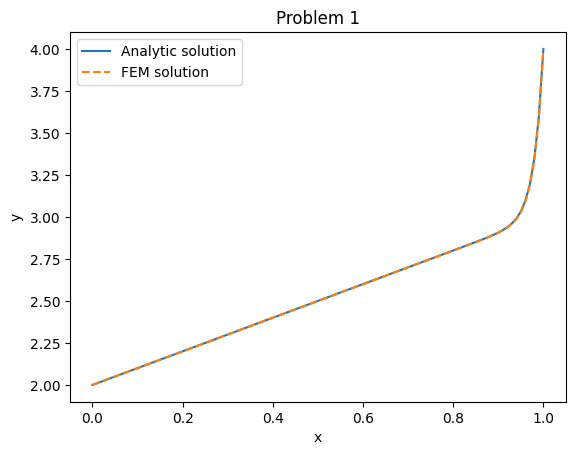

In [4]:
# set the parameters
α = 2
β = 4
ε = 0.02
N = 100
x = np.linspace(0, 1, N + 1)

# calculate the solutions
y = analytic_solution(x, α, β, ε)
y_hat = FEM(x, ε, α, β)

# plot the solutions
plt.plot(x, y, label = 'Analytic solution')
plt.plot(x, y_hat, linestyle = "dashed", label = 'FEM solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 1')
plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

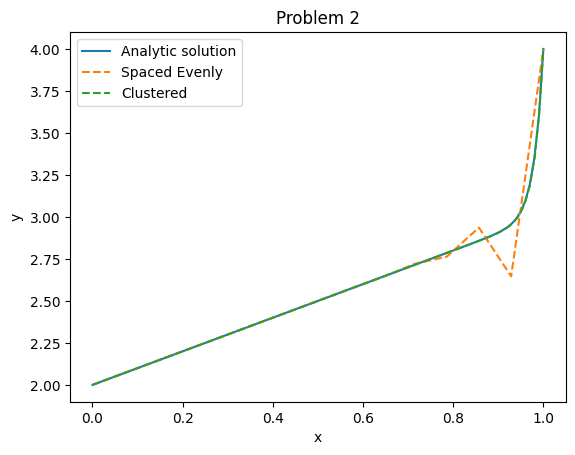

In [5]:
# set the parameters
a = 0
b = 1
even = np.linspace(a, b, 15)
cluster = np.linspace(a, b, 15) ** (1 / 8)
α = 2
β = 4
ε = 0.02
N = 15

# calculate the solutions
y = analytic_solution(x, α, β, ε)
y_even = FEM(even, ε, α, β)
y_cluster = FEM(cluster, ε, α, β)

# plot the solutions
plt.plot(x, y, label = 'Analytic solution')
plt.plot(even, y_even, linestyle = "dashed", label = 'Spaced Evenly')
plt.plot(cluster, y_cluster, linestyle = "dashed", label = 'Clustered')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problem 2')
plt.legend()
plt.show()


# Problem 3

Solve 

$\epsilon y'' - y' = -1$

$y(0)=\alpha, y(1)=\beta$

with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

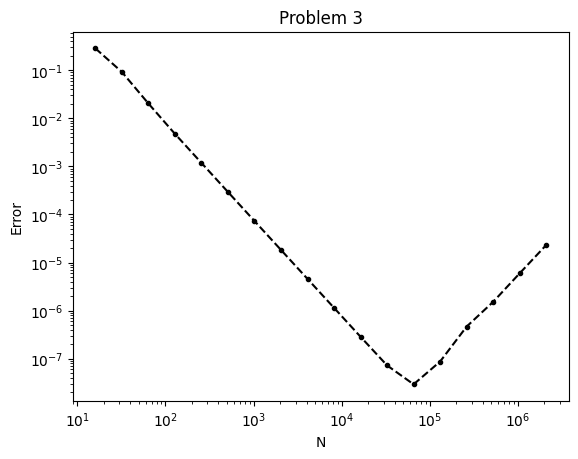

In [6]:
# set the parameters
errors = []

# calculate the errors
for i in range(4, 22):
    n = 2 ** i
    x = np.linspace(0, 1, n)
    y_true = analytic_solution(x, α, β, ε)
    y_hat = FEM(x, ε, α, β)
    errors.append(np.linalg.norm(y_true - y_hat, ord = np.inf))

# plot the errors
plt.loglog(2 ** np.arange(4, 22), errors,'--.', color = 'k')
plt.title("Problem 3")
plt.xlabel('N')
plt.ylabel('Error')
plt.show()